  <div align="center">
      <font color="black" size=8px>
        <b> Heart Disease Predictedtion </b>
      </font>
  </div>

<font color='black'>
    
# **INTRODUCTION:**

<font color='#black'>

   ##### The dataset is from 2020 annual CDC survey data of 400k adults related to their health status.
    
    Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

<A ID="34"></A>
<FONT COLOR='BLACK'>
      
      
# CONTENT:
1. [VARIABLE DESCRIPTION](#36)
1. [MISSING VALUE ANALYSIS](#37)
1. [EXPLORATORY DATA ANALYSIS](#1)
	* [CATEGORICAL VARIABLES](#2)
	* [CLASSES OF CATEGORICAL VARIABLES](#3)
	* [NUMBER OF CLASSES OF CATEGORICAL VARIABLES](#4)
	* [FREQUENCIES OF THE CLASSES OF THE CATEGORICAL VARIABLES](#5)
	* [NUMERICAL VARIABLES](#6)
	* [CONVERTING ORDINAL VARIABLES](#7)
	* [HEARTDISEASE VS BMI](#8)
	* [HEARTDISEASE VS SLEEPTIME](#9)
	* [SEX VS MENTALHEALTH](#10)
	* [AGECATEGORY VS MENTALHEALTH](#11)
	* [OUTLIER DETECTION](#12)
	* [VISUALIZATION](#12)
		* [CORRELATION BETWEEN VARIABLES](#13)
		* [AGE](#14)
		* [BMI](#15)
		* [SMOKING](#16)
		* [ALCOHOL](#17)
1. [ML MODEL BUILDING](#18)
	* [PREPROCESSING](#19)
	* [TRAINTEST SPLIT](#20)
	* [BASE MODELS](#21)
		* [OVER SAMPLING BASE MODEL](#22)
		* [CLASS WEIGHTAGE TO BASE MODEL](#23)
	* [MODEL 2](#24) 
		* [PREPROCESSING](#25)
		* [LOGREG MODEL](#26)
		* [SELECTING CUTOFF VALUE](#27)
		* [LOGREG MODEL WITH CUTOFF VALUE](#28)
	* [MODEL 3](#29)
		* [FEATURE ENGINEERING](#30)
			* [RECURSSIVE FEATURE ELIMINATION](#31)
			* [ORDINAL ENCODING AND FEATURE ENGINEERING](#32)
		* [MODEL 3](#33)
		* [MODEL 4](#38)
		* [STACKING ALGORITHM](#34)
1. [PICKLING](#35)
		

<a id="1"></a>

<font color='black'>
    
# IMPORTING REQUIRED DATASET

In [1]:
# warnings
import warnings
warnings.filterwarnings('ignore')

# Data Wrangling Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as ply

# Machine Learning libraries
## Pre Processing
from sklearn.preprocessing import *
from sklearn.model_selection import *

## Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## Metrics
from sklearn.metrics import *

## validation
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

<a id="2"></a>

<font color='black'>
    
# LOAD & FIRST LOOK TO DATA

In [2]:
data=pd.read_csv("heart_2020_cleaned.csv")

In [3]:
df=data.copy() # copy of the original dataset

In [4]:
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

In [5]:
print(df.dtypes)
print(f"Shape of the Dataset{df.shape}")

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object
Shape of the Dataset(319795, 18)


In [6]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [7]:
df.describe().T

count       mean       std    min    25%    50%    75%  \
BMI             319795.0  28.325399  6.356100  12.02  24.03  27.34  31.42   
PhysicalHealth  319795.0   3.371710  7.950850   0.00   0.00   0.00   2.00   
MentalHealth    319795.0   3.898366  7.955235   0.00   0.00   0.00   3.00   
SleepTime       319795.0   7.097075  1.436007   1.00   6.00   7.00   8.00   

                  max  
BMI             94.85  
PhysicalHealth  30.00  
MentalHealth    30.00  
SleepTime       24.00

In [8]:
df.describe(include="all").T #including all columns

count unique        top    freq       mean       std  \
HeartDisease        319795      2         No  292422        NaN       NaN   
BMI               319795.0    NaN        NaN     NaN  28.325399    6.3561   
Smoking             319795      2         No  187887        NaN       NaN   
AlcoholDrinking     319795      2         No  298018        NaN       NaN   
Stroke              319795      2         No  307726        NaN       NaN   
PhysicalHealth    319795.0    NaN        NaN     NaN    3.37171   7.95085   
MentalHealth      319795.0    NaN        NaN     NaN   3.898366  7.955235   
DiffWalking         319795      2         No  275385        NaN       NaN   
Sex                 319795      2     Female  167805        NaN       NaN   
AgeCategory         319795     13      65-69   34151        NaN       NaN   
Race                319795      6      White  245212        NaN       NaN   
Diabetic            319795      4         No  269653        NaN       NaN   
PhysicalActivity    319795      2        Yes  247957        NaN       NaN   
GenHealth           319795      5  Very good  113858        NaN       NaN   
SleepTime         319795.0    NaN        NaN     NaN   7.097075  1.436007   
Asthma              319795      2         No  276923        NaN       NaN   
KidneyDisease       319795      2         No  308016        NaN       NaN   
SkinCancer          319795      2         No  289976        NaN       NaN   

                    min    25%    50%    75%    max  
HeartDisease        NaN    NaN    NaN    NaN    NaN  
BMI               12.02  24.03  27.34  31.42  94.85  
Smoking             NaN    NaN    NaN    NaN    NaN  
AlcoholDrinking     NaN    NaN    NaN    NaN    NaN  
Stroke              NaN    NaN    NaN    NaN    NaN  
PhysicalHealth      0.0    0.0    0.0    2.0   30.0  
MentalHealth        0.0    0.0    0.0    3.0   30.0  
DiffWalking         NaN    NaN    NaN    NaN    NaN  
Sex                 NaN    NaN    NaN    NaN    NaN  
AgeCategory         NaN    NaN    NaN    NaN    NaN  
Race                NaN    NaN    NaN    NaN    NaN  
Diabetic            NaN    NaN    NaN    NaN    NaN  
PhysicalActivity    NaN    NaN    NaN    NaN    NaN  
GenHealth           NaN    NaN    NaN    NaN    NaN  
SleepTime           1.0    6.0    7.0    8.0   24.0  
Asthma              NaN    NaN    NaN    NaN    NaN  
KidneyDisease       NaN    NaN    NaN    NaN    NaN  
SkinCancer          NaN    NaN    NaN    NaN    NaN

<a id="1"></a>

<font color='black'>

# **EXPLORATORY DATA ANALYSIS** 

<a id="36"></a>

<font color='black'>

# **VARIABLE DESCRIPTION**

1. HeartDisease : Have you ever had a heart attack? (Yes / No)
1. BMI : Body Mass Index
1. Smoking : Have you ever smoked? (Yes / No)
1. AlcoholDrinking : Have you ever drank alcohol (Yes / No)
1. Stroke : (Ever told) (you had) a stroke? (Yes / No)
1. PhysicalHealth : How many days during the past 30 days was your physical health not good? (0-30 days)
1. MentalHealth : how many days during the past 30 days was mental health not good? (0-30 days)
1. DiffWalking: Difficulty walking or climbing stairs (Yes / No)
1. Sex : Male or Female
1. AgeCategory : Thirteen-level age category
    * 18-24
    * 25-29
    * 30-34
    * 35-39
    * 40-44
    * 45-49
    * 50-54
    * 55-59
    * 60-64
    * 65-69
    * 70-74
    * 75-79
    * 80 or older
1. Race : Ethnicity
1. Diabetic : (Ever told) (you had) diabetes? (Yes / No)
1. PhysicalActivity : Doing physical activity or exercise during the past 30 days other than their regular job (Yes / No)
1. GenHealth : General health
1. SleepTime: Hours of sleeping in 24-hour period
1. Asthma : (Ever told) (you had) asthma? (Yes / No)
1. KidneyDisease : (Ever told) (you had) kidney disease? (Yes / No)
1. SkinCanser : (Ever told) (you had) skin canser? (Yes / No)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

<a id="37"></a>

<font color='black'>

# MISSING VALUES
    
<font color='black'>

* Find Missing Values
* Fill Missing Values

In [10]:
# Are there any missing value?
df.isnull().values.any()

False

No Missing Values

<a id="6"></a>

<font color='black'>
    
<font color='black'>

## 1. Categorical Variable:

<font color='black'>

    
*     HeartDisease
*     Smoking
*     AlcoholDrinking
*     Stroke
*     DiffWalking
*     Sex
*     AgeCategory
*     Race 
*     Diabetic
*     PhysicalActivity
*     GenHealth
*     Asthma
*     KidneyDisease
*     SkinCancer
    
<font color='black'>


## 2. Numerical Variable:
    
<font color='black'>

    
*      BMI
*      PhysicalHealth
*      MentalHealth
*      SleepTime

<a id="2"></a>

<font color='black'>


## CATEGORICAL VARIABLES


In [11]:
df_cat=df.select_dtypes(include=["object"])
df_cat.head(10)

HeartDisease Smoking AlcoholDrinking Stroke DiffWalking     Sex  \
0           No     Yes              No     No          No  Female   
1           No      No              No    Yes          No  Female   
2           No     Yes              No     No          No    Male   
3           No      No              No     No          No  Female   
4           No      No              No     No         Yes  Female   
5          Yes     Yes              No     No         Yes  Female   
6           No      No              No     No          No  Female   
7           No     Yes              No     No         Yes  Female   
8           No      No              No     No          No  Female   
9           No      No              No     No         Yes    Male   

   AgeCategory   Race                 Diabetic PhysicalActivity  GenHealth  \
0        55-59  White                      Yes              Yes  Very good   
1  80 or older  White                       No              Yes  Very good   
2        65-69  White                      Yes              Yes       Fair   
3        75-79  White                       No               No       Good   
4        40-44  White                       No              Yes  Very good   
5        75-79  Black                       No               No       Fair   
6        70-74  White                       No              Yes       Fair   
7  80 or older  White                      Yes               No       Good   
8  80 or older  White  No, borderline diabetes               No       Fair   
9        65-69  White                       No              Yes       Good   

  Asthma KidneyDisease SkinCancer  
0    Yes            No        Yes  
1     No            No         No  
2    Yes            No         No  
3     No            No        Yes  
4     No            No         No  
5     No            No         No  
6    Yes            No        Yes  
7    Yes            No         No  
8     No           Yes         No  
9     No            No         No

## CLASSES OF CATEGORICAL VARIABLES:

In [12]:
df_cat.AgeCategory.unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [13]:
df_cat.GenHealth.unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

### NUMBER OF CLASSES OF CLASSES OF CATEGORICAL VARIABLE:

In [14]:
df_cat.AgeCategory.value_counts().count()

13

In [15]:
df_cat.GenHealth.value_counts().count()

5

### FREQUENCIES OF CLASSES OF CATEGORICL VARIABLE:

In [16]:
df_cat.AgeCategory.value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [17]:
df_cat.GenHealth.value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

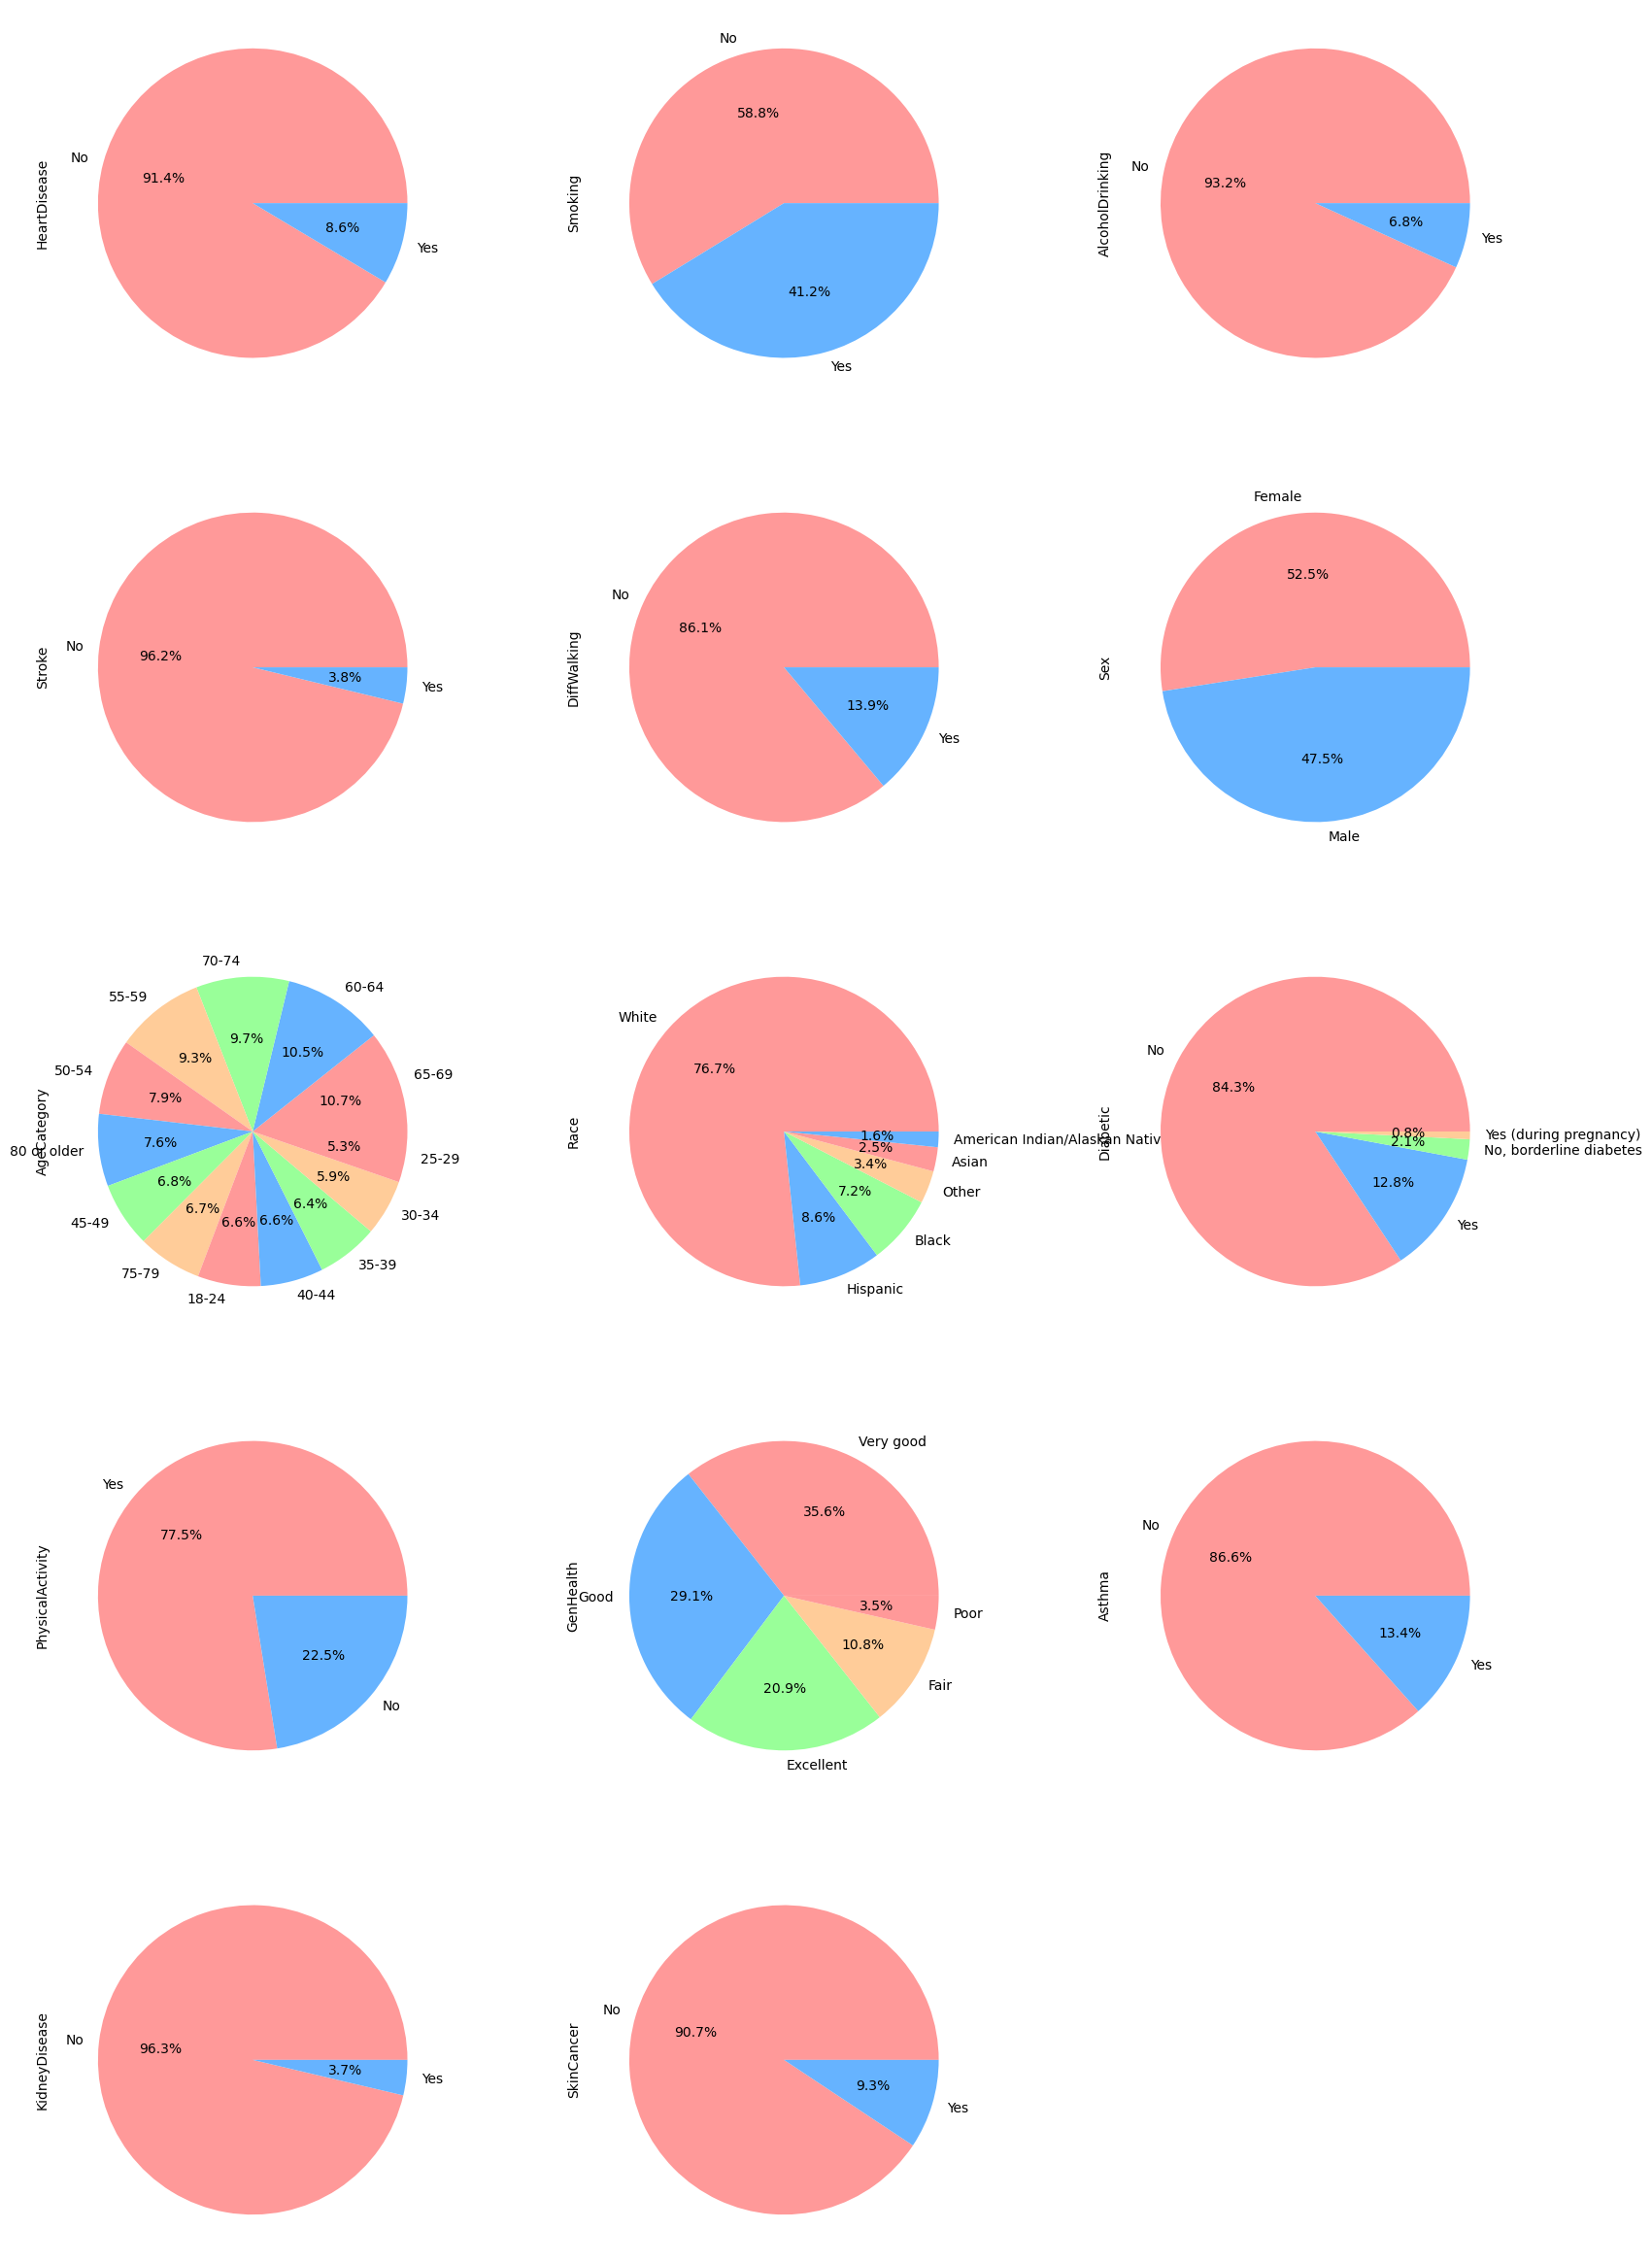

In [18]:
fig, ax = plt.subplots(nrows = 5, ncols=3, figsize=(20, 30))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
for i, subplot in zip(df_cat.columns, ax.flatten()):
    (pd.DataFrame(df[i].value_counts())).plot.pie(y = i, autopct= '%.1f%%', ax= subplot, colors= colors, legend= False)
fig.delaxes(ax[4,2])
plt.show()

<a id="6"></a>

<font color='black'>


## NUMERIC VARIABLES

In [19]:
df_num=df.select_dtypes(include=["float64"])
df_num.head(10)

BMI  PhysicalHealth  MentalHealth  SleepTime
0  16.60             3.0          30.0        5.0
1  20.34             0.0           0.0        7.0
2  26.58            20.0          30.0        8.0
3  24.21             0.0           0.0        6.0
4  23.71            28.0           0.0        8.0
5  28.87             6.0           0.0       12.0
6  21.63            15.0           0.0        4.0
7  31.64             5.0           0.0        9.0
8  26.45             0.0           0.0        5.0
9  40.69             0.0           0.0       10.0

In [20]:
df_num.describe().T

count       mean       std    min    25%    50%    75%  \
BMI             319795.0  28.325399  6.356100  12.02  24.03  27.34  31.42   
PhysicalHealth  319795.0   3.371710  7.950850   0.00   0.00   0.00   2.00   
MentalHealth    319795.0   3.898366  7.955235   0.00   0.00   0.00   3.00   
SleepTime       319795.0   7.097075  1.436007   1.00   6.00   7.00   8.00   

                  max  
BMI             94.85  
PhysicalHealth  30.00  
MentalHealth    30.00  
SleepTime       24.00

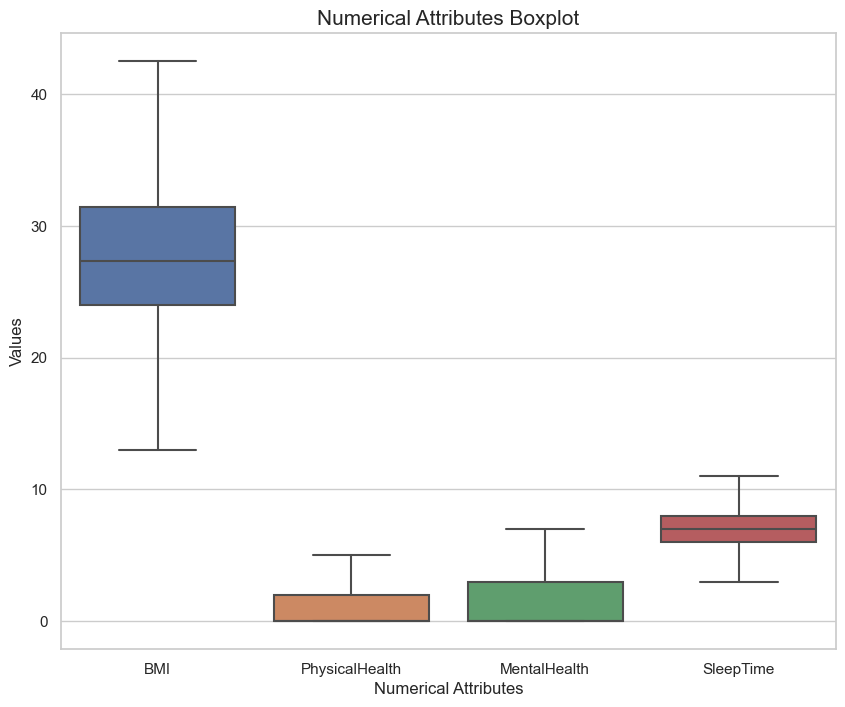

In [21]:
plt.figure(figsize=(10,8))
sns.set_palette("RdPu")
sns.set_theme(style="whitegrid")
sns.boxplot(data=df_num, showfliers=False)  
plt.xlabel("Numerical Attributes", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Numerical Attributes Boxplot", fontsize= 15)
plt.show()

In [22]:
# df_numerical = df_num.join(df['HeartDisease'])
# sns.pairplot(df_numerical,hue="HeartDisease")
# plt.show()

<a id="7"></a>

<font color='black'>


## CONVERTING TO ORDINAL VARIABLE

In [23]:
from pandas.api.types import CategoricalDtype

In [24]:
df.GenHealth.head()

0    Very good
1    Very good
2         Fair
3         Good
4    Very good
Name: GenHealth, dtype: object

In [25]:
# We order the feature GenHealth variables
df.GenHealth=df.GenHealth.astype(CategoricalDtype(ordered=True))

In [26]:
df.GenHealth.dtypes

CategoricalDtype(categories=['Excellent', 'Fair', 'Good', 'Poor', 'Very good'], ordered=True)

In [27]:
df.GenHealth.head(1)

0    Very good
Name: GenHealth, dtype: category
Categories (5, object): ['Excellent' < 'Fair' < 'Good' < 'Poor' < 'Very good']

This order is not suitable for our dataset

In [28]:
# Lets create a list which include correct order:
GenHealth_category=["Poor","Fair","Good","Very good","Excellent"]

In [29]:
df.GenHealth=df.GenHealth.astype(CategoricalDtype(ordered=True,categories=GenHealth_category))

In [30]:
df.GenHealth.head(1)
# Now its correct

0    Very good
Name: GenHealth, dtype: category
Categories (5, object): ['Poor' < 'Fair' < 'Good' < 'Very good' < 'Excellent']

<a id="9"></a>

<font color='black'>


## HeartDisease-BMI

In [31]:
df[["HeartDisease","BMI"]].groupby(["HeartDisease"],as_index=False).mean().sort_values(by="HeartDisease",ascending=False)

HeartDisease        BMI
1          Yes  29.401592
0           No  28.224658

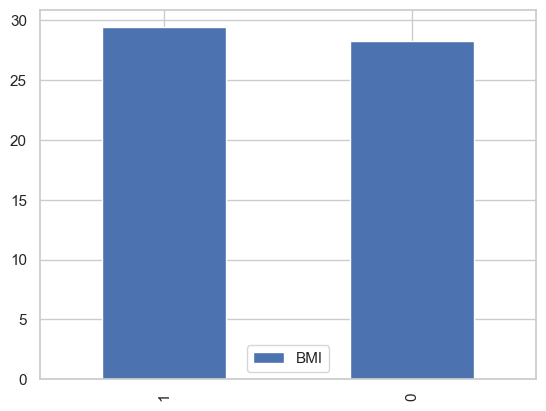

In [32]:
df[["HeartDisease","BMI"]].groupby(["HeartDisease"],as_index=False).mean().sort_values(by="HeartDisease",ascending=False).plot.bar()

plt.show()

<a id="9"></a>

<font color='black'>


## HeartDisease-SleepTime

In [33]:
df[["HeartDisease","SleepTime"]].groupby(["HeartDisease"],as_index=False).mean().sort_values(by="HeartDisease",ascending=False)

HeartDisease  SleepTime
1          Yes   7.136156
0           No   7.093416

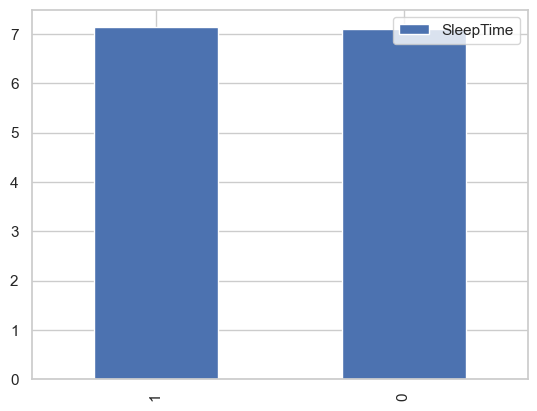

In [34]:
df[["HeartDisease","SleepTime"]].groupby(["HeartDisease"],as_index=False).mean().sort_values(by="HeartDisease",ascending=False).plot.bar()
plt.show()

<a id="10"></a>

<font color='black'>


## Sex-MentalHealth

In [35]:
df[["Sex","MentalHealth"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Sex",ascending=False)

Sex  MentalHealth
1    Male      3.061991
0  Female      4.655916

<a id="11"></a>

<font color='black'>


## AgeCategory-MentalHealth

In [36]:
df[["AgeCategory","MentalHealth"]].groupby(["AgeCategory"],as_index=False).mean().sort_values(by="AgeCategory",ascending=False)

AgeCategory  MentalHealth
12  80 or older      1.902290
11        75-79      2.280328
10        70-74      2.562562
9         65-69      2.887587
8         60-64      3.550555
7         55-59      4.055953
6         50-54      4.321763
5         45-49      4.385710
4         40-44      4.675188
3         35-39      5.049781
2         30-34      5.292540
1         25-29      5.729106
0         18-24      6.152535

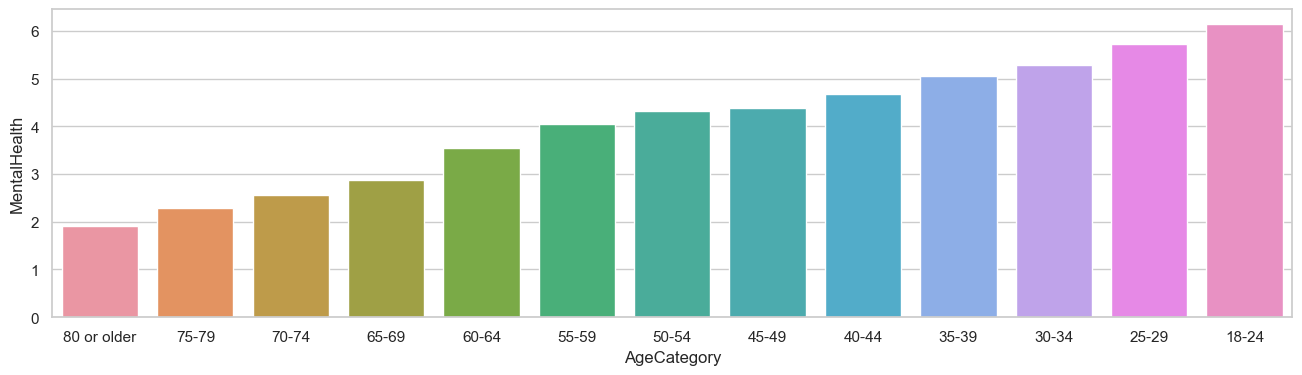

In [37]:
age_menth = df[["AgeCategory","MentalHealth"]].groupby(["AgeCategory"],as_index=False).mean().sort_values(by="AgeCategory",ascending=False)

plt.figure(figsize=(16, 4))
sns.barplot(age_menth['AgeCategory'], age_menth["MentalHealth"])
plt.show()

In [38]:
heartDisease="HeartDisease"

<a id="12"></a>

<font color='black'>


# OUTLIER DETECTION

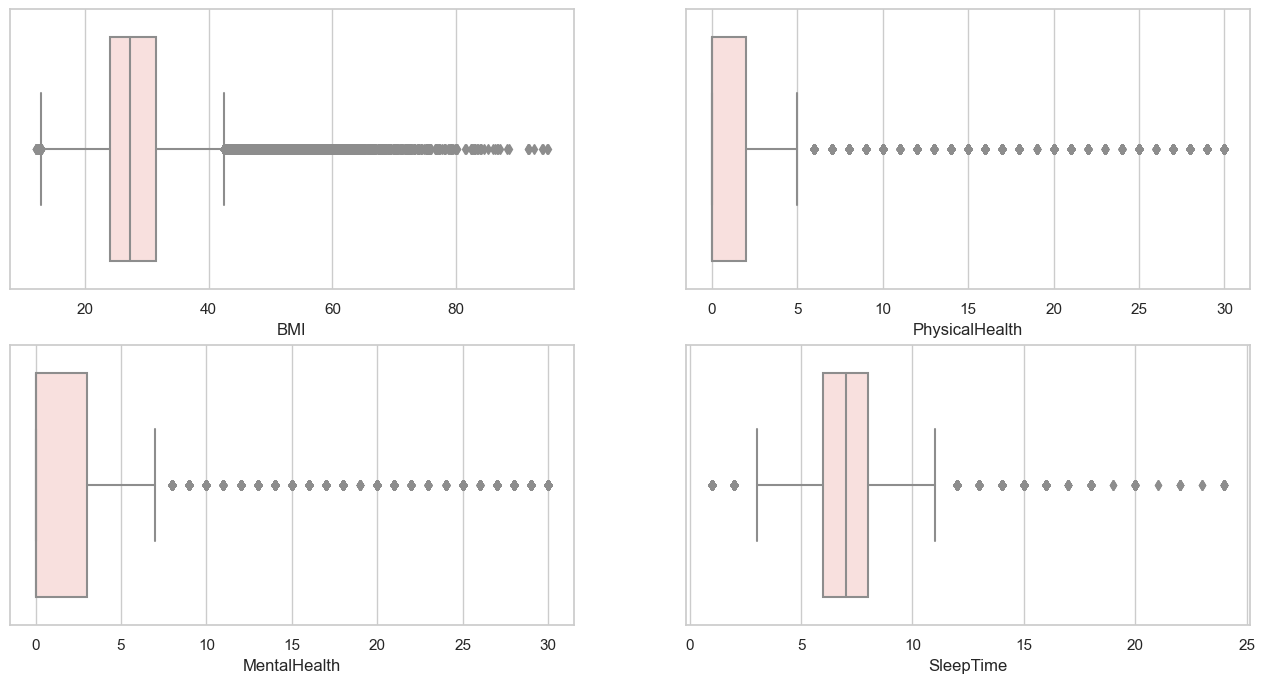

In [39]:
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize=(16, 8))

for i, subplot in zip(df_num.columns,  ax.flatten()):
    sns.set_palette("RdPu")
    sns.boxplot(df[i], ax=subplot)
# fig.delaxes(ax[3,1])
plt.show()

<a id="12"></a>

<font color='black'>


# VISUALIZATION

In [40]:
df_num.head(1)

BMI  PhysicalHealth  MentalHealth  SleepTime
0  16.6             3.0          30.0        5.0

<a id="13"></a>

<font color='black'>


### Correlation Between Numeric Variables

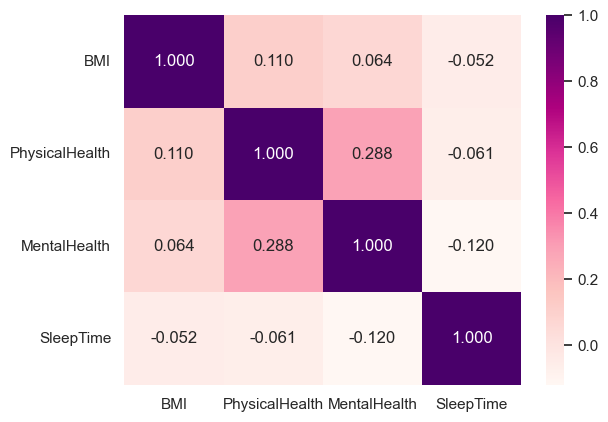

In [41]:
corr_list=["BMI","PhysicalHealth","MentalHealth","SleepTime"]
sns.heatmap(df[corr_list].corr(),annot=True,fmt=".3f",cmap="RdPu");
plt.show()

<a id="14"></a>

<font color='black'>


### AGE

In [42]:
# Prepare Data:
age_category={
    "18-24":18,"25-29":25,"30-34":30,"35-39":35,"40-44":40, 
    "45-49":45,"50-54":50,"55-59":55,"60-64":60,"65-69":65,
    "70-74":70,"75-79":75,"80 or older":80
}

temp=df[['HeartDisease',"Sex","AgeCategory","Race"]]
temp["AgeCategory"]=temp["AgeCategory"].apply(lambda x : age_category[x])
tempAge=temp[temp[heartDisease]=="Yes"].groupby(["AgeCategory"])[[heartDisease]].count().rename(columns={heartDisease:f"{heartDisease}_count"})
tempAge["total_count"]=temp.groupby(["AgeCategory"])[[heartDisease]].count()
tempAge[f'{heartDisease}_ratio'] = tempAge[f'{heartDisease}_count'] / tempAge['total_count']
tempAge[f'{heartDisease}_cumratio_total'] = tempAge[f'{heartDisease}_count'].cumsum() / tempAge['total_count'].cumsum()
tempAge[f'{heartDisease}_cumratio_yes'] = tempAge[f'{heartDisease}_count'].cumsum() / len(temp[temp[heartDisease]=='Yes'])

In [43]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo
pyo.init_notebook_mode()

In [44]:
fig=make_subplots(specs=[[{"secondary_y":True}]])
fig.add_trace(go.Scatter(x=tempAge.index,y=tempAge[f"{heartDisease}_count"],line=dict(color="purple"),name="The number of Heart Disease by Age"),secondary_y=False)
fig.add_trace(go.Scatter(x=tempAge.index,y=tempAge["total_count"],line=dict(color="cyan"),name="The number of People by Age"),secondary_y=False)
fig.update_layout(title='<b>THE NUMBER of HEART DISEASE by AGE</b>', template="simple_white")
fig.update_layout(legend=dict(x=0, y=1.4), margin=dict(l=20, r=20, t=200, b=70))
fig.update_yaxes(title="Count", rangemode="tozero", secondary_y=False)
fig.update_xaxes(title="AgeCategory")
fig.show()

In [45]:
fig=make_subplots(specs=[[{"secondary_y":True}]])
fig.add_trace(go.Bar(x=tempAge.index,y=tempAge[f"{heartDisease}_ratio"],marker=dict(color=["lightcoral"]*9+["darkred"]*10),name="The Ratio of Heart Disease in Age"),secondary_y=False)
fig.add_trace(go.Scatter(x=tempAge.index, y=tempAge[f'{heartDisease}_cumratio_yes'],line=dict(color="black") ,name='The Cumulative Sum of Ratio of Heart Diseas by Age'),secondary_y=True)
fig.update_layout(title='<b>THE PERCENTAGE of HEART DISEASE by AGE</b>', template="simple_white")
fig.update_layout(legend=dict(x=0, y=1.4), margin=dict(l=20, r=20, t=200, b=70))
fig.update_yaxes(title="Ratio", rangemode="tozero", secondary_y=False)
fig.update_yaxes(title="Cumulative Sum of Ratio", rangemode="tozero", secondary_y=True)
fig.update_xaxes(title="AgeCategory")
fig.show()

<a id="15"></a>

<font color='black'>


### BMI

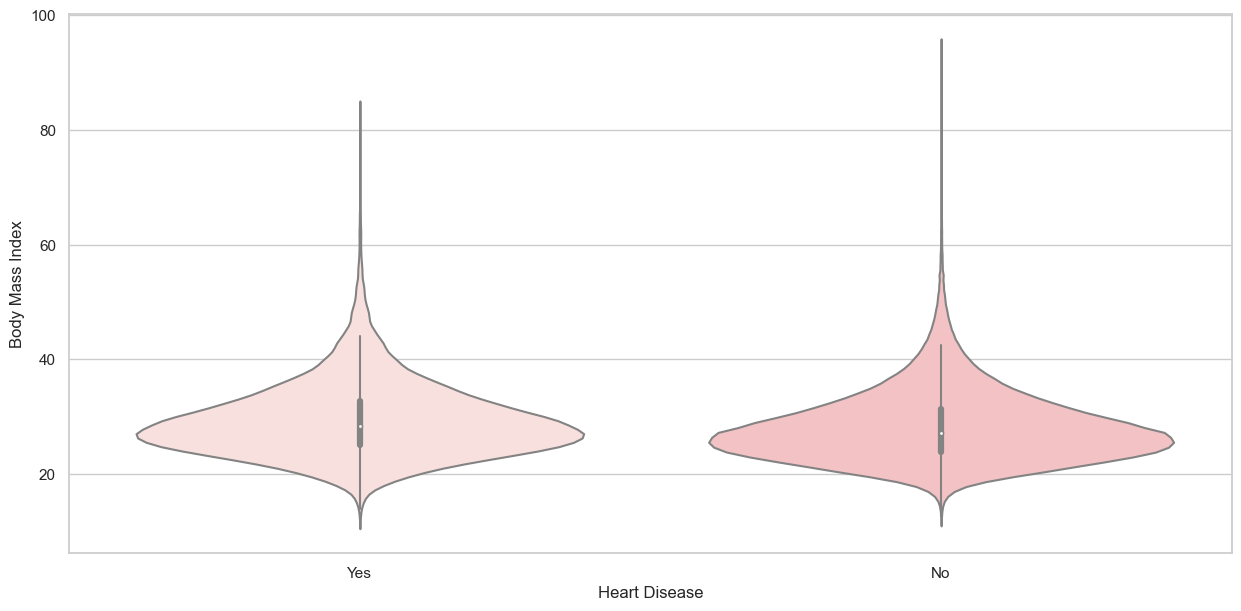

In [46]:
hd_yes=df[df["HeartDisease"]=="Yes"]
hd_no=df[df["HeartDisease"]=="No"]
sample=pd.concat([hd_yes,hd_no])


sns.set_palette("RdPu")
plt.figure(figsize=(15,7))
sns.violinplot(data=sample,x="HeartDisease",y="BMI")
plt.xlabel("Heart Disease")
plt.ylabel("Body Mass Index")
plt.show()

<a id="16"></a>

<font color='black'>

   

### SMOKING

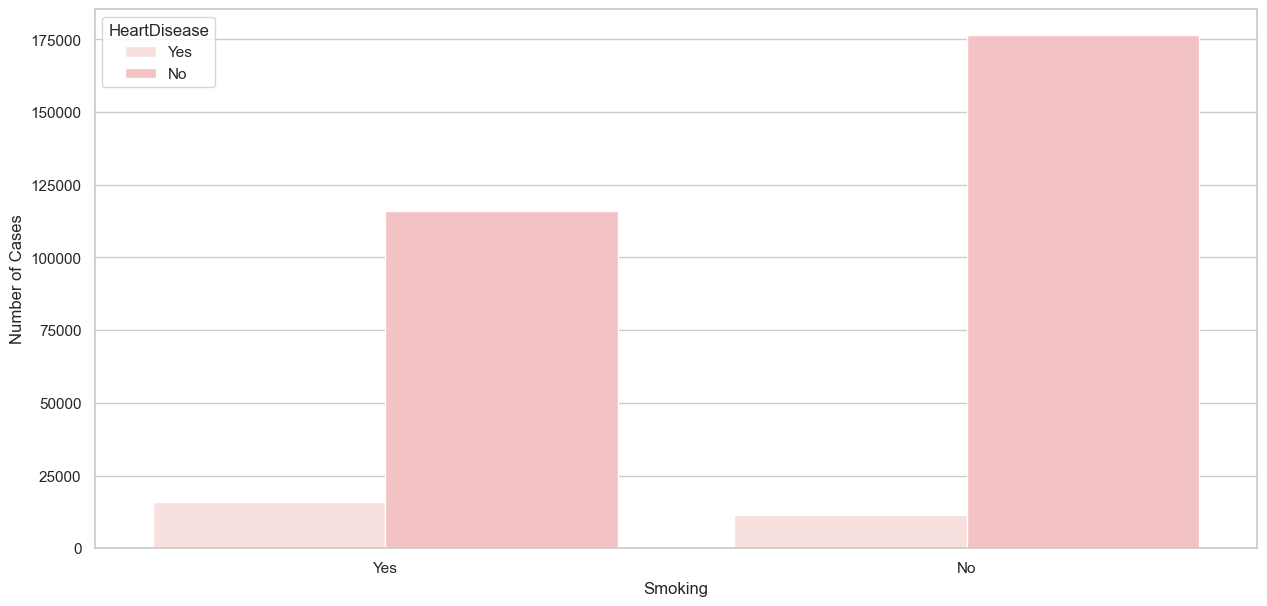

In [47]:
sns.set_palette("RdPu")
plt.figure(figsize=(15,7))
sns.countplot(data=sample,x="Smoking",hue="HeartDisease")
plt.xlabel("Smoking")
plt.ylabel("Number of Cases")
plt.show()

<a id="17"></a>

<font color='black'>


### ALCOHOL

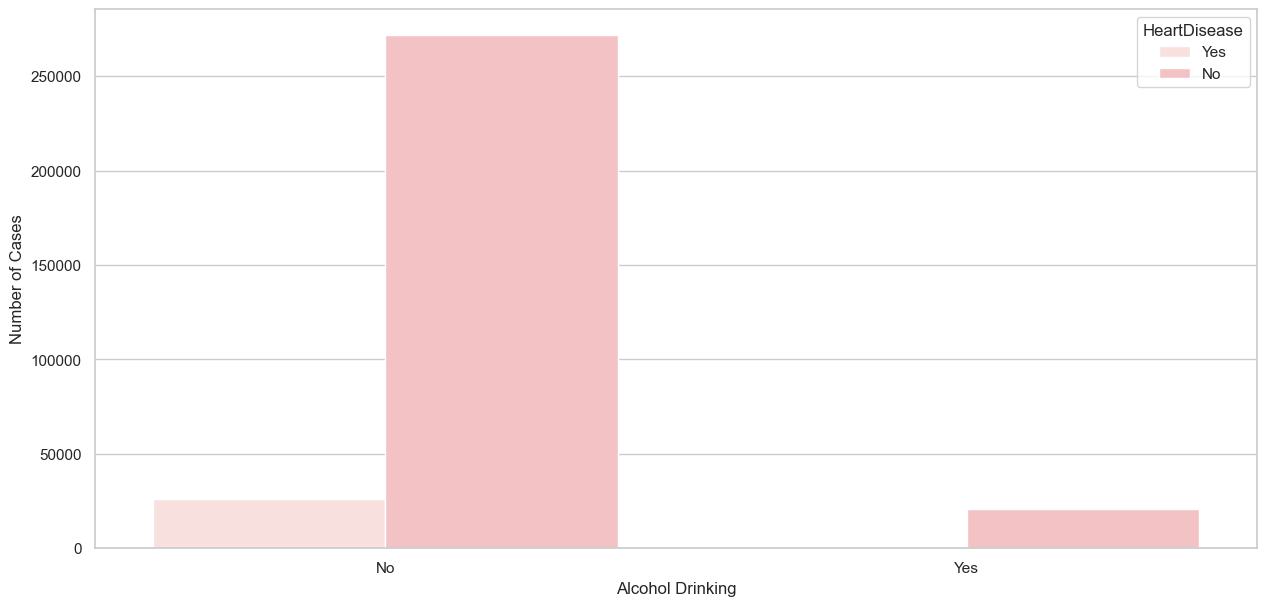

In [48]:
sns.set_palette("RdPu")
plt.figure(figsize=(15,7))
sns.countplot(data=sample,x="AlcoholDrinking",hue="HeartDisease")
plt.xlabel("Alcohol Drinking")
plt.ylabel("Number of Cases")
plt.show()

<a id="18"></a>

<font color='black'>

# **ML MODEL BUILDING** 

<a id="19"></a>

<font color='black'>


## PREPROCESSING

In [49]:
df["id"]=range(1,319796)
df=df.set_index("id")

In [50]:
df

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
id                                                                          
1                No  16.60     Yes              No     No             3.0   
2                No  20.34      No              No    Yes             0.0   
3                No  26.58     Yes              No     No            20.0   
4                No  24.21      No              No     No             0.0   
5                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319791          Yes  27.41     Yes              No     No             7.0   
319792           No  29.84     Yes              No     No             0.0   
319793           No  24.24      No              No     No             0.0   
319794           No  32.81      No              No     No             0.0   
319795           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
id                                                                         
1               30.0          No  Female        55-59     White      Yes   
2                0.0          No  Female  80 or older     White       No   
3               30.0          No    Male        65-69     White      Yes   
4                0.0          No  Female        75-79     White       No   
5                0.0         Yes  Female        40-44     White       No   
...              ...         ...     ...          ...       ...      ...   
319791           0.0         Yes    Male        60-64  Hispanic      Yes   
319792           0.0          No    Male        35-39  Hispanic       No   
319793           0.0          No  Female        45-49  Hispanic       No   
319794           0.0          No  Female        25-29  Hispanic       No   
319795           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
id                                                                             
1                   Yes  Very good        5.0    Yes            No        Yes  
2                   Yes  Very good        7.0     No            No         No  
3                   Yes       Fair        8.0    Yes            No         No  
4                    No       Good        6.0     No            No        Yes  
5                   Yes  Very good        8.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
319791               No       Fair        6.0    Yes            No         No  
319792              Yes  Very good        5.0    Yes            No         No  
319793              Yes       Good        6.0     No            No         No  
319794               No       Good       12.0     No            No         No  
319795              Yes       Good        8.0     No            No         No  

[319795 rows x 18 columns]

In [51]:
df.GenHealth = df.GenHealth.astype('object')

In [52]:
df_cat=df.select_dtypes(include=["object"])
df_cat

HeartDisease Smoking AlcoholDrinking Stroke DiffWalking     Sex  \
id                                                                       
1                No     Yes              No     No          No  Female   
2                No      No              No    Yes          No  Female   
3                No     Yes              No     No          No    Male   
4                No      No              No     No          No  Female   
5                No      No              No     No         Yes  Female   
...             ...     ...             ...    ...         ...     ...   
319791          Yes     Yes              No     No         Yes    Male   
319792           No     Yes              No     No          No    Male   
319793           No      No              No     No          No  Female   
319794           No      No              No     No          No  Female   
319795           No      No              No     No          No  Female   

        AgeCategory      Race Diabetic PhysicalActivity  GenHealth Asthma  \
id                                                                          
1             55-59     White      Yes              Yes  Very good    Yes   
2       80 or older     White       No              Yes  Very good     No   
3             65-69     White      Yes              Yes       Fair    Yes   
4             75-79     White       No               No       Good     No   
5             40-44     White       No              Yes  Very good     No   
...             ...       ...      ...              ...        ...    ...   
319791        60-64  Hispanic      Yes               No       Fair    Yes   
319792        35-39  Hispanic       No              Yes  Very good    Yes   
319793        45-49  Hispanic       No              Yes       Good     No   
319794        25-29  Hispanic       No               No       Good     No   
319795  80 or older  Hispanic       No              Yes       Good     No   

       KidneyDisease SkinCancer  
id                               
1                 No        Yes  
2                 No         No  
3                 No         No  
4                 No        Yes  
5                 No         No  
...              ...        ...  
319791            No         No  
319792            No         No  
319793            No         No  
319794            No         No  
319795            No         No  

[319795 rows x 14 columns]

In [53]:
df_cat=df_cat.columns
df_cat

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [54]:
for var in df_cat:
    Dummy=pd.get_dummies(df[var], drop_first= True).add_prefix(var)
    df=df.merge(Dummy,on="id")
    df=df.drop([var],axis=1)

In [55]:
y=df.HeartDiseaseYes

In [56]:
df.describe().T

count       mean       std    min    25%  \
BMI                              319795.0  28.325399  6.356100  12.02  24.03   
PhysicalHealth                   319795.0   3.371710  7.950850   0.00   0.00   
MentalHealth                     319795.0   3.898366  7.955235   0.00   0.00   
SleepTime                        319795.0   7.097075  1.436007   1.00   6.00   
HeartDiseaseYes                  319795.0   0.085595  0.279766   0.00   0.00   
SmokingYes                       319795.0   0.412477  0.492281   0.00   0.00   
AlcoholDrinkingYes               319795.0   0.068097  0.251912   0.00   0.00   
StrokeYes                        319795.0   0.037740  0.190567   0.00   0.00   
DiffWalkingYes                   319795.0   0.138870  0.345812   0.00   0.00   
SexMale                          319795.0   0.475273  0.499389   0.00   0.00   
AgeCategory25-29                 319795.0   0.053018  0.224070   0.00   0.00   
AgeCategory30-34                 319795.0   0.058641  0.234951   0.00   0.00   
AgeCategory35-39                 319795.0   0.064260  0.245216   0.00   0.00   
AgeCategory40-44                 319795.0   0.065686  0.247733   0.00   0.00   
AgeCategory45-49                 319795.0   0.068141  0.251987   0.00   0.00   
AgeCategory50-54                 319795.0   0.079370  0.270315   0.00   0.00   
AgeCategory55-59                 319795.0   0.093050  0.290503   0.00   0.00   
AgeCategory60-64                 319795.0   0.105336  0.306987   0.00   0.00   
AgeCategory65-69                 319795.0   0.106790  0.308847   0.00   0.00   
AgeCategory70-74                 319795.0   0.097140  0.296149   0.00   0.00   
AgeCategory75-79                 319795.0   0.067174  0.250324   0.00   0.00   
AgeCategory80 or older           319795.0   0.075527  0.264239   0.00   0.00   
RaceAsian                        319795.0   0.025229  0.156819   0.00   0.00   
RaceBlack                        319795.0   0.071730  0.258041   0.00   0.00   
RaceHispanic                     319795.0   0.085824  0.280104   0.00   0.00   
RaceOther                        319795.0   0.034172  0.181671   0.00   0.00   
RaceWhite                        319795.0   0.766779  0.422883   0.00   1.00   
DiabeticNo, borderline diabetes  319795.0   0.021204  0.144065   0.00   0.00   
DiabeticYes                      319795.0   0.127588  0.333631   0.00   0.00   
DiabeticYes (during pregnancy)   319795.0   0.008002  0.089095   0.00   0.00   
PhysicalActivityYes              319795.0   0.775362  0.417344   0.00   1.00   
GenHealthFair                    319795.0   0.108435  0.310930   0.00   0.00   
GenHealthGood                    319795.0   0.291215  0.454323   0.00   0.00   
GenHealthPoor                    319795.0   0.035301  0.184539   0.00   0.00   
GenHealthVery good               319795.0   0.356034  0.478826   0.00   0.00   
AsthmaYes                        319795.0   0.134061  0.340718   0.00   0.00   
KidneyDiseaseYes                 319795.0   0.036833  0.188352   0.00   0.00   
SkinCancerYes                    319795.0   0.093244  0.290775   0.00   0.00   

                                   50%    75%    max  
BMI                              27.34  31.42  94.85  
PhysicalHealth                    0.00   2.00  30.00  
MentalHealth                      0.00   3.00  30.00  
SleepTime                         7.00   8.00  24.00  
HeartDiseaseYes                   0.00   0.00   1.00  
SmokingYes                        0.00   1.00   1.00  
AlcoholDrinkingYes                0.00   0.00   1.00  
StrokeYes                         0.00   0.00   1.00  
DiffWalkingYes                    0.00   0.00   1.00  
SexMale                           0.00   1.00   1.00  
AgeCategory25-29                  0.00   0.00   1.00  
AgeCategory30-34                  0.00   0.00   1.00  
AgeCategory35-39                  0.00   0.00   1.00  
AgeCategory40-44                  0.00   0.00   1.00  
AgeCategory45-49                  0.00   0.00   1.00  
AgeCategory50-54                  0

In [57]:
X=df.drop(["HeartDiseaseYes"],axis=1)
y= df.HeartDiseaseYes

In [58]:
X.head(5)

BMI  PhysicalHealth  MentalHealth  SleepTime  SmokingYes  \
id                                                               
1   16.60             3.0          30.0        5.0           1   
2   20.34             0.0           0.0        7.0           0   
3   26.58            20.0          30.0        8.0           1   
4   24.21             0.0           0.0        6.0           0   
5   23.71            28.0           0.0        8.0           0   

    AlcoholDrinkingYes  StrokeYes  DiffWalkingYes  SexMale  AgeCategory25-29  \
id                                                                             
1                    0          0               0        0                 0   
2                    0          1               0        0                 0   
3                    0          0               0        1                 0   
4                    0          0               0        0                 0   
5                    0          0               1        0                 0   

    ...  DiabeticYes  DiabeticYes (during pregnancy)  PhysicalActivityYes  \
id  ...                                                                     
1   ...            1                               0                    1   
2   ...            0                               0                    1   
3   ...            1                               0                    1   
4   ...            0                               0                    0   
5   ...            0                               0                    1   

    GenHealthFair  GenHealthGood  GenHealthPoor  GenHealthVery good  \
id                                                                    
1               0              0              0                   1   
2               0              0              0                   1   
3               1              0              0                   0   
4               0              1              0                   0   
5               0              0              0                   1   

    AsthmaYes  KidneyDiseaseYes  SkinCancerYes  
id                                              
1           1                 0              1  
2           0                 0              0  
3           1                 0              0  
4           0                 0              1  
5           0                 0              0  

[5 rows x 37 columns]

<a id="20"></a>

<font color='black'>


## TRAIN-TEST SPLIT

In [59]:
# Stratified sampling to get 50:50 of Both 0 and 1 classes in Test set

stratified_sample = df.groupby('HeartDiseaseYes', group_keys=False).apply(lambda x: x.sample(7500))
X_test = stratified_sample.drop("HeartDiseaseYes", axis=1)
y_test= stratified_sample.HeartDiseaseYes


In [60]:
df_stratified = pd.concat((X_test,y_test), axis=1)
df_stratified["HeartDiseaseYes"].value_counts()


0    7500
1    7500
Name: HeartDiseaseYes, dtype: int64

In [61]:
# Train Set
# To avoid dataleakage from train to test we are going to remove the duplicates from the train set by merging

df_all = df.merge(df_stratified.drop_duplicates(), on= ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'SmokingYes',
       'AlcoholDrinkingYes', 'StrokeYes', 'DiffWalkingYes', 'SexMale',
       'AgeCategory25-29', 'AgeCategory30-34', 'AgeCategory35-39',
       'AgeCategory40-44', 'AgeCategory45-49', 'AgeCategory50-54',
       'AgeCategory55-59', 'AgeCategory60-64', 'AgeCategory65-69',
       'AgeCategory70-74', 'AgeCategory75-79', 'AgeCategory80 or older',
       'RaceAsian', 'RaceBlack', 'RaceHispanic', 'RaceOther', 'RaceWhite',
       'DiabeticNo, borderline diabetes', 'DiabeticYes',
       'DiabeticYes (during pregnancy)', 'PhysicalActivityYes',
       'GenHealthFair', 'GenHealthGood', 'GenHealthPoor', 'GenHealthVery good',
       'AsthmaYes', 'KidneyDiseaseYes', 'SkinCancerYes', 'HeartDiseaseYes'], how="left", indicator='True')

train_dataset = df_all[df_all['True'] == 'left_only']

X_train = train_dataset.drop(["HeartDiseaseYes", "True"], axis=1)
y_train = train_dataset.HeartDiseaseYes

In [62]:
print(y_train.value_counts())
y_test.value_counts()

0    283507
1     19832
Name: HeartDiseaseYes, dtype: int64


0    7500
1    7500
Name: HeartDiseaseYes, dtype: int64

<a id="21"></a>

<font color='black'>


## BASE MODELS

In [63]:
models=[KNeighborsClassifier(),LogisticRegression(),XGBClassifier(),RandomForestClassifier(), GaussianNB()]
scores=dict()

performance_table = ['Model', 'Accuracy', 'Precision', 'Percentage_mislabbled'
                    'Total_Ones', 'Mislabble_Ones', 'Percent_Mislabbled_Ones', 
                    'Recall_Score', 'F1_Score']

Model = []
Accuracy = []
Precision = []
Percentage_mislabbled = []
Percent_Mislabbled_zeroes =[]
Percent_Mislabbled_Ones =[]
Recall_Score =[]
F1_Score = []


for m in models:
    m.fit(X_train,y_train)
    y_pred=m.predict(X_test)
    percent_mislabbled = (((y_test != y_pred).sum())/X_test.shape[0])*100
    

    y_pred_df = pd.DataFrame(np.array(y_pred), columns= ['ypred'])
    y_test_df = pd.DataFrame(y_test.values, columns = ['y_test'])
    df_test = pd.concat([y_pred_df, y_test_df], axis=1)
    df_test1 = df_test[df_test['y_test'] == 1]
    df_test0 = df_test[df_test['y_test'] == 0]
    percent_how_many_ones_mislabbled = ((df_test1.y_test != df_test1.ypred).sum()) / (len(df_test[df_test['y_test'] == 1])) * 100
    percent_how_many_zeroes_mislabbled = ((df_test0.y_test != df_test0.ypred).sum()) / (len(df_test[df_test['y_test'] == 0])) * 100
    
    

    Model.append(m)    
    Accuracy.append(accuracy_score(y_test,y_pred))
    Precision.append(precision_score(y_test,y_pred))
    Percentage_mislabbled.append(percent_mislabbled)
    Percent_Mislabbled_zeroes.append(percent_how_many_zeroes_mislabbled)    
    Percent_Mislabbled_Ones.append(percent_how_many_ones_mislabbled)
    Recall_Score.append(recall_score(y_test,y_pred))
    F1_Score.append(f1_score(y_test,y_pred))

performance_table = {'Model':Model , 'Accuracy':Accuracy, 'Precision': Precision, 'Percentage_mislabbled':Percentage_mislabbled, 
                     'Percent_Mislabbled_zeroes': Percent_Mislabbled_zeroes,
                                            'Percent_Mislabbled_Ones': Percent_Mislabbled_Ones , 'Recall_Score': Recall_Score, 
                                            'F1_Score' :F1_Score}

performance_table_base_model = pd.DataFrame(performance_table)
performance_table_base_model


Model  Accuracy  Precision  \
0                             KNeighborsClassifier()  0.519067   0.857500   
1                               LogisticRegression()  0.532600   0.937388   
2  XGBClassifier(base_score=0.5, booster='gbtree'...  0.529000   0.941176   
3  (DecisionTreeClassifier(max_features='auto', r...  0.528800   0.826284   
4                                       GaussianNB()  0.737667   0.739551   

   Percentage_mislabbled  Percent_Mislabbled_zeroes  Percent_Mislabbled_Ones  \
0              48.093333                   0.760000                95.426667   
1              46.740000                   0.466667                93.013333   
2              47.100000                   0.386667                93.813333   
3              47.120000                   1.533333                92.706667   
4              26.233333                  25.840000                26.626667   

   Recall_Score  F1_Score  
0      0.045733  0.086835  
1      0.069867  0.130041  
2      0.061867  0.116102  
3      0.072933  0.134036  
4      0.733733  0.736631

In [64]:
performance_table_base_model.to_csv("performance_table_base_model.csv")

<a id="22"></a>

<font color='black'>


### OVERSAMPLING


In [67]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_os, y_train_os = oversample.fit_resample(X_train, y_train)

In [68]:
y_train_os.value_counts()

0    283507
1    283507
Name: HeartDiseaseYes, dtype: int64

In [69]:
models=[KNeighborsClassifier(),LogisticRegression(),XGBClassifier(),RandomForestClassifier(), GaussianNB()]
scores=dict()

performance_table = ['Model', 'Accuracy', 'Precision', 'Percentage_mislabbled'
                     'Total_Ones', 'Mislabble_Ones', 'Percent_Mislabbled_Ones', 'Recall_Score', 'F1_Score']

Model = []
Accuracy = []
Precision = []
Percentage_mislabbled = []
Percent_Mislabbled_zeroes =[]
Percent_Mislabbled_Ones =[]
Recall_Score =[]
F1_Score = []


for m in models:
    m.fit(X_train_os,y_train_os)
    y_pred=m.predict(X_test)
    percent_mislabbled = (((y_test != y_pred).sum())/X_test.shape[0])*100
    

    y_pred_df = pd.DataFrame(np.array(y_pred), columns= ['ypred'])
    y_test_df = pd.DataFrame(y_test.values, columns = ['y_test'])
    df_test = pd.concat([y_pred_df, y_test_df], axis=1)
    df_test1 = df_test[df_test['y_test'] == 1]
    df_test0 = df_test[df_test['y_test'] == 0]
    percent_how_many_ones_mislabbled = ((df_test1.y_test != df_test1.ypred).sum()) / (len(df_test[df_test['y_test'] == 1])) * 100
    percent_how_many_zeroes_mislabbled = ((df_test0.y_test != df_test0.ypred).sum()) / (len(df_test[df_test['y_test'] == 0])) * 100
    
    Model.append(m)    
    Accuracy.append(accuracy_score(y_test,y_pred))
    Precision.append(precision_score(y_test,y_pred))
    Percentage_mislabbled.append(percent_mislabbled)
    Percent_Mislabbled_zeroes.append(percent_how_many_zeroes_mislabbled)    
    Percent_Mislabbled_Ones.append(percent_how_many_ones_mislabbled)
    Recall_Score.append(recall_score(y_test,y_pred))
    F1_Score.append(f1_score(y_test,y_pred))

performance_table = {'Model':Model , 'Accuracy':Accuracy, 'Precision': Precision, 'Percentage_mislabbled':Percentage_mislabbled, 'Percent_Mislabbled_zeroes': Percent_Mislabbled_zeroes,
                                            'Percent_Mislabbled_Ones': Percent_Mislabbled_Ones , 'Recall_Score': Recall_Score, 
                                            'F1_Score' :F1_Score}

performance_table_oversampling = pd.DataFrame(performance_table)
performance_table_oversampling

Model  Accuracy  Precision  \
0                             KNeighborsClassifier()  0.628600   0.658452   
1                               LogisticRegression()  0.657133   0.697107   
2  XGBClassifier(base_score=0.5, booster='gbtree'...  0.606000   0.739891   
3  (DecisionTreeClassifier(max_features='auto', r...  0.546000   0.688731   
4                                       GaussianNB()  0.657467   0.630238   

   Percentage_mislabbled  Percent_Mislabbled_zeroes  Percent_Mislabbled_Ones  \
0              37.140000                  27.720000                46.560000   
1              34.286667                  24.146667                44.426667   
2              39.400000                  11.493333                67.306667   
3              45.400000                   7.586667                83.213333   
4              34.253333                  44.706667                23.800000   

   Recall_Score  F1_Score  
0      0.534400  0.589976  
1      0.555733  0.618444  
2      0.326933  0.453486  
3      0.167867  0.269940  
4      0.762000  0.689884

<font color='red'>

** We can see that Over sampling with SMOTE give some good results but we cannot proceed with, since we are working with HealthCare Data we cannot fabricate the records this might end in giving Type II Error, lets proceed with Class Weightage **

<a id="23"></a>

<font color='black'>

### CLASS WEIGHTAGE 

In [70]:
y_train.value_counts()  

0    283507
1     19832
Name: HeartDiseaseYes, dtype: int64

In [71]:
283494/19826

14.299102189044689

In [72]:
classweight = {0: 1, 1: 14}

from sklearn.tree import DecisionTreeClassifier
models=[KNeighborsClassifier(),LogisticRegression(class_weight=classweight),XGBClassifier(), GaussianNB(), RandomForestClassifier(class_weight=classweight)]
scores=dict()

performance_table = ['Model', 'Accuracy', 'Precision', 'Percentage_mislabbled'
                                            'Total_Ones', 'Mislabble_Ones', 'Percent_Mislabbled_Ones', 'Recall_Score', 'F1_Score']

Model = []
Accuracy = []
Precision = []
Percentage_mislabbled = []
Percent_Mislabbled_zeroes =[]
Percent_Mislabbled_Ones =[]
Recall_Score =[]
F1_Score = []


for m in models:
    m.fit(X_train,y_train)
    y_pred=m.predict(X_test)
    percent_mislabbled = (((y_test != y_pred).sum())/X_test.shape[0])*100
    

    y_pred_df = pd.DataFrame(np.array(y_pred), columns= ['ypred'])
    y_test_df = pd.DataFrame(y_test.values, columns = ['y_test'])
    df_test = pd.concat([y_pred_df, y_test_df], axis=1)
    df_test1 = df_test[df_test['y_test'] == 1]
    df_test0 = df_test[df_test['y_test'] == 0]
    percent_how_many_ones_mislabbled = ((df_test1.y_test != df_test1.ypred).sum()) / (len(df_test[df_test['y_test'] == 1])) * 100
    percent_how_many_zeroes_mislabbled = ((df_test0.y_test != df_test0.ypred).sum()) / (len(df_test[df_test['y_test'] == 0])) * 100
    
    

    Model.append(m)    
    Accuracy.append(accuracy_score(y_test,y_pred))
    Precision.append(precision_score(y_test,y_pred))
    Percentage_mislabbled.append(percent_mislabbled)
    Percent_Mislabbled_zeroes.append(percent_how_many_zeroes_mislabbled)    
    Percent_Mislabbled_Ones.append(percent_how_many_ones_mislabbled)
    Recall_Score.append(recall_score(y_test,y_pred))
    F1_Score.append(f1_score(y_test,y_pred))

performance_table = {'Model':Model , 'Accuracy':Accuracy, 'Precision': Precision, 'Percentage_mislabbled':Percentage_mislabbled, 'Percent_Mislabbled_zeroes': Percent_Mislabbled_zeroes,
                                            'Percent_Mislabbled_Ones': Percent_Mislabbled_Ones , 'Recall_Score': Recall_Score, 
                                            'F1_Score' :F1_Score}

performance_table_clswht = pd.DataFrame(performance_table)
performance_table_clswht

Model  Accuracy  Precision  \
0                             KNeighborsClassifier()  0.519067   0.857500   
1     LogisticRegression(class_weight={0: 1, 1: 14})  0.762600   0.756012   
2  XGBClassifier(base_score=0.5, booster='gbtree'...  0.529000   0.941176   
3                                       GaussianNB()  0.737667   0.739551   
4  (DecisionTreeClassifier(max_features='auto', r...  0.524267   0.806397   

   Percentage_mislabbled  Percent_Mislabbled_zeroes  Percent_Mislabbled_Ones  \
0              48.093333                   0.760000                95.426667   
1              23.740000                  25.026667                22.453333   
2              47.100000                   0.386667                93.813333   
3              26.233333                  25.840000                26.626667   
4              47.573333                   1.533333                93.613333   

   Recall_Score  F1_Score  
0      0.045733  0.086835  
1      0.775467  0.765616  
2      0.061867  0.116102  
3      0.733733  0.736631  
4      0.063867  0.118359

From the above vase model we can see that Logistic Regression and Gaussian Naive Bayes is giving good Result. lets tune Logistic Regression Model and stack it with Naive Bayes

Steps to do:

    -Scale the Data

    -Feature Engineering of Variables
    
    -Tunign threshold for bestfit

    -stacking algorithm with Naive Bayes 
    
    -Evaluation

<a id="24"></a>

<font color='black'>

## MODEL 2

In [73]:
df_copy = df.copy()

In [74]:
df["id"]=range(1,319796)
df=df.set_index("id")

In [75]:
df_cat=df.select_dtypes(include=["object"])

In [76]:
df_categorical=df_cat.columns
df_categorical

Index([], dtype='object')

In [77]:
for var in df_categorical:
    Dummy=pd.get_dummies(df[var], drop_first= True).add_prefix(var)
    df=df.merge(Dummy,on="id")
    df=df.drop([var],axis=1)

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
scaler=MinMaxScaler()
columns=df.columns
s=scaler.fit_transform(df)

df=pd.DataFrame(s,columns=columns)
df.head(5)

BMI  PhysicalHealth  MentalHealth  SleepTime  HeartDiseaseYes  \
0  0.055294        0.100000           1.0   0.173913              0.0   
1  0.100447        0.000000           0.0   0.260870              0.0   
2  0.175782        0.666667           1.0   0.304348              0.0   
3  0.147169        0.000000           0.0   0.217391              0.0   
4  0.141132        0.933333           0.0   0.304348              0.0   

   SmokingYes  AlcoholDrinkingYes  StrokeYes  DiffWalkingYes  SexMale  ...  \
0         1.0                 0.0        0.0             0.0      0.0  ...   
1         0.0                 0.0        1.0             0.0      0.0  ...   
2         1.0                 0.0        0.0             0.0      1.0  ...   
3         0.0                 0.0        0.0             0.0      0.0  ...   
4         0.0                 0.0        0.0             1.0      0.0  ...   

   DiabeticYes  DiabeticYes (during pregnancy)  PhysicalActivityYes  \
0          1.0                             0.0                  1.0   
1          0.0                             0.0                  1.0   
2          1.0                             0.0                  1.0   
3          0.0                             0.0                  0.0   
4          0.0                             0.0                  1.0   

   GenHealthFair  GenHealthGood  GenHealthPoor  GenHealthVery good  AsthmaYes  \
0            0.0            0.0            0.0                 1.0        1.0   
1            0.0            0.0            0.0                 1.0        0.0   
2            1.0            0.0            0.0                 0.0        1.0   
3            0.0            1.0            0.0                 0.0        0.0   
4            0.0            0.0            0.0                 1.0        0.0   

   KidneyDiseaseYes  SkinCancerYes  
0               0.0            1.0  
1               0.0            0.0  
2               0.0            0.0  
3               0.0            1.0  
4               0.0            0.0  

[5 rows x 38 columns]

In [80]:
stratified_sample = df.groupby('HeartDiseaseYes', group_keys=False).apply(lambda x: x.sample(7500))

X_test = stratified_sample.drop("HeartDiseaseYes", axis=1)
y_test= stratified_sample.HeartDiseaseYes

In [81]:
df_stratified = pd.concat((X_test,y_test), axis=1)
df_stratified["HeartDiseaseYes"].value_counts()

0.0    7500
1.0    7500
Name: HeartDiseaseYes, dtype: int64

In [82]:
df_all = df.merge(df_stratified.drop_duplicates(), on= ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'SmokingYes',
                                                        'AlcoholDrinkingYes', 'StrokeYes', 'DiffWalkingYes', 'SexMale',
                                                        'AgeCategory25-29', 'AgeCategory30-34', 'AgeCategory35-39',
                                                        'AgeCategory40-44', 'AgeCategory45-49', 'AgeCategory50-54',
                                                        'AgeCategory55-59', 'AgeCategory60-64', 'AgeCategory65-69',
                                                        'AgeCategory70-74', 'AgeCategory75-79', 'AgeCategory80 or older',
                                                        'RaceAsian', 'RaceBlack', 'RaceHispanic', 'RaceOther', 'RaceWhite',
                                                        'DiabeticNo, borderline diabetes', 'DiabeticYes',
                                                        'DiabeticYes (during pregnancy)', 'PhysicalActivityYes',
                                                        'GenHealthFair', 'GenHealthGood', 'GenHealthPoor', 'GenHealthVery good',
                                                        'AsthmaYes', 'KidneyDiseaseYes', 'SkinCancerYes', 'HeartDiseaseYes'], 
                                                        how="left", indicator='True')

train_dataset = df_all[df_all['True'] == 'left_only']

X_train = train_dataset.drop(["HeartDiseaseYes", "True"], axis=1)
y_train = train_dataset.HeartDiseaseYes

In [83]:
print(y_train.value_counts())
y_test.value_counts()

0.0    283327
1.0     19834
Name: HeartDiseaseYes, dtype: int64


0.0    7500
1.0    7500
Name: HeartDiseaseYes, dtype: int64

In [84]:
logreg = LogisticRegression(class_weight = {0: 1, 1: 14})
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

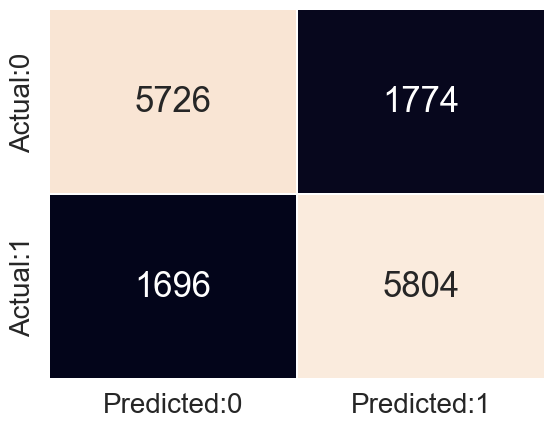

In [85]:
cm = confusion_matrix(y_test, y_pred_logreg)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])


sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

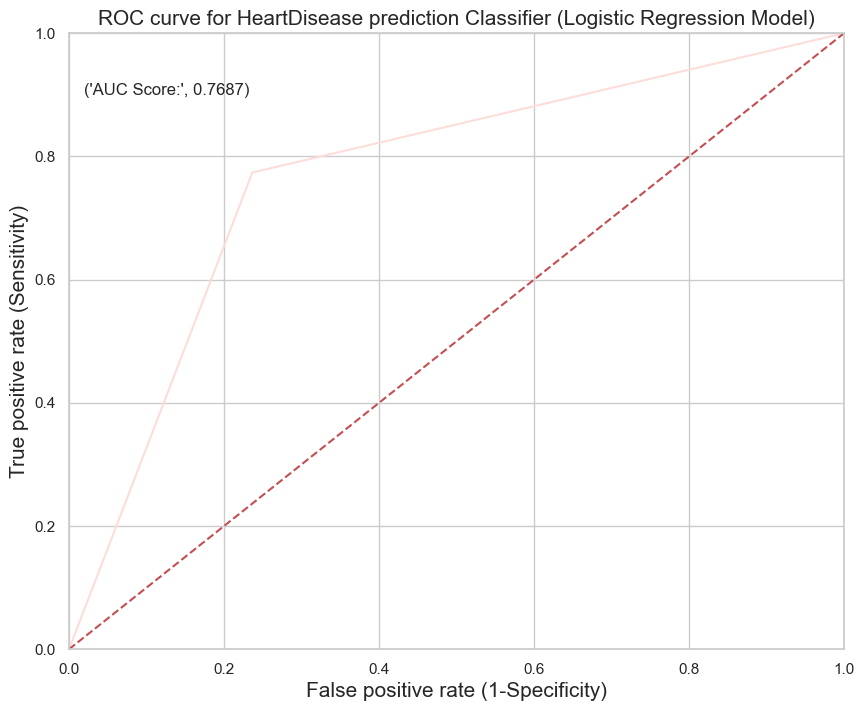

In [86]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for HeartDisease prediction Classifier (Logistic Regression Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred_logreg),4)))
                               
plt.grid(True)

<a id="27"></a>

<font color='black'>

### SELECTING CUTOFF VALUE 

In [87]:
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

 
def update_score_card(model, cutoff):
       
    y_pred_prob = logreg.predict_proba(X_test)
    y_pred_prob = pd.DataFrame(y_pred_prob)[1]

    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    global score_card

    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : roc_auc_score(y_test, y_pred),
                                    'Precision Score': precision_score(y_test, y_pred),
                                    'Recall Score': recall_score(y_test, y_pred),
                                    'Accuracy Score': accuracy_score(y_test, y_pred),
                                    'Kappa Score':cohen_kappa_score(y_test, y_pred),
                                    'f1-score': f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [88]:
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for value in cutoff:
    update_score_card(logreg, value)
print('Score Card for Logistic regression:')

score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True)

score_card.style.highlight_max(color = 'lightblack', subset = ['AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score'])

Score Card for Logistic regression:


<a id="28"></a>

<font color='black'>

### BUILFING MODEL WITH NEW CUTOFF 0.4

In [89]:
score_card_withcutoff = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

y_pred_prob = logreg.predict_proba(X_test)
y_pred_prob = pd.DataFrame(y_pred_prob)[1]

y_pred_cutoff = [0 if x < 0.5 else 1 for x in y_pred_prob]

score_card_withcutoff = score_card_withcutoff.append({'Probability Cutoff': 0.4,
                                'AUC Score' : roc_auc_score(y_test, y_pred_cutoff),
                                'Precision Score': precision_score(y_test, y_pred_cutoff),
                                'Recall Score': recall_score(y_test, y_pred_cutoff),
                                'Accuracy Score': accuracy_score(y_test, y_pred_cutoff),
                                'Kappa Score':cohen_kappa_score(y_test, y_pred_cutoff),
                                'f1-score': f1_score(y_test, y_pred_cutoff)}, 
                                ignore_index = True)

score_card_withcutoff

Probability Cutoff  AUC Score  Precision Score  Recall Score  \
0                 0.4   0.768667         0.765901      0.773867   

   Accuracy Score  Kappa Score  f1-score  
0        0.768667     0.537333  0.769863

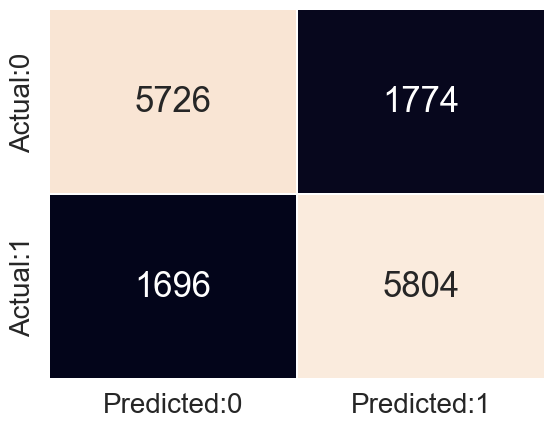

In [90]:
cm = confusion_matrix(y_test, y_pred_cutoff)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])


sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

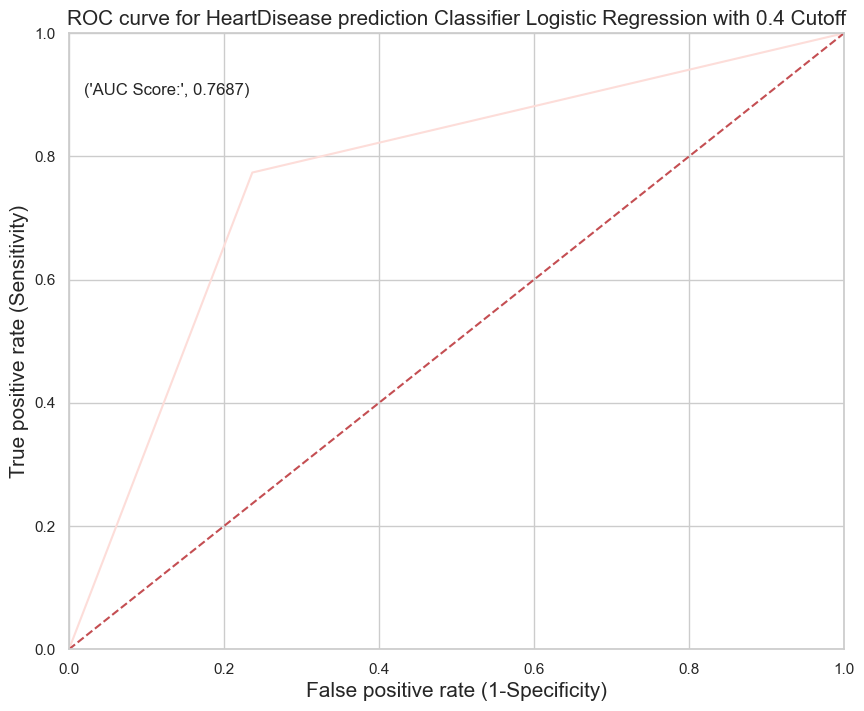

In [91]:
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_cutoff)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for HeartDisease prediction Classifier Logistic Regression with 0.4 Cutoff', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred_cutoff),4)))
                               
plt.grid(True)

<a id="29"></a>

<font color='black'>

## Model 3

<a id="30"></a>

<font color='black'>

### FEATURE ENGINEERING TO IMPROVE LOGISTIC REGRESSION MODEL

<a id="29"></a>

<font color='black'>

### RECURSSIVE FEATURE ELIMINATION

In [92]:
from sklearn.feature_selection import RFE

X_train_rfe = X_train
X_test_rfe = X_test

logreg = LogisticRegression()

rfe_model = RFE(estimator = logreg, n_features_to_select = 25)

rfe_model = rfe_model.fit(X_train_rfe, y_train)

feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)

signi_feat_rfe = feat_index[feat_index==1].index

print(f"Top 25 Significant Features: {signi_feat_rfe}")

Top 25 Significant Features: Index(['BMI', 'SleepTime', 'SmokingYes', 'AlcoholDrinkingYes', 'StrokeYes',
       'SexMale', 'AgeCategory30-34', 'AgeCategory35-39', 'AgeCategory40-44',
       'AgeCategory45-49', 'AgeCategory50-54', 'AgeCategory55-59',
       'AgeCategory60-64', 'AgeCategory65-69', 'AgeCategory70-74',
       'AgeCategory75-79', 'AgeCategory80 or older', 'RaceAsian',
       'DiabeticYes', 'GenHealthFair', 'GenHealthGood', 'GenHealthPoor',
       'GenHealthVery good', 'AsthmaYes', 'KidneyDiseaseYes'],
      dtype='object')


<a id="32"></a>

<font color='black'>

### ORDINAL ENCODING AND FEATURE ENGINEERING

In [93]:
df_copy = pd.read_csv("heart_2020_cleaned.csv")

In [94]:
df_copy.GenHealth.value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [95]:
df_copy.GenHealth = df_copy.GenHealth.replace(["Poor", "Fair", "Good", "Very good", "Excellent"], [5, 4, 3, 2, 1])

In [96]:
df_copy.GenHealth.value_counts()

2    113858
3     93129
1     66842
4     34677
5     11289
Name: GenHealth, dtype: int64

In [97]:
df_copy = df_copy.drop("Race", axis=1)

In [98]:
df_copy.Diabetic = df_copy.Diabetic.replace(["No, borderline diabetes", "Yes (during pregnancy)"], ["No", "No"])

In [99]:
df_copy.Diabetic = df_copy.Diabetic.replace(["Yes", "No"], [1, 0])
df_copy.Asthma = df_copy.Asthma.replace(["Yes", "No"], [1, 0])
df_copy.KidneyDisease = df_copy.KidneyDisease.replace(["Yes", "No"], [1, 0])
df_copy.SkinCancer = df_copy.SkinCancer.replace(["Yes", "No"], [1, 0])

In [100]:
print(df_copy.Diabetic.value_counts())
print(df_copy.Asthma.value_counts())
print(df_copy.KidneyDisease.value_counts())
print(df_copy["SkinCancer"].value_counts())

0    278993
1     40802
Name: Diabetic, dtype: int64
0    276923
1     42872
Name: Asthma, dtype: int64
0    308016
1     11779
Name: KidneyDisease, dtype: int64
0    289976
1     29819
Name: SkinCancer, dtype: int64


In [101]:
df_copy['Severity'] = df_copy["Diabetic"] + df_copy['Asthma'] + df_copy['KidneyDisease'] + df_copy["SkinCancer"] # Creating New Column Severity based on number of diseases Patient have

In [102]:
df_copy = df_copy.drop(['Diabetic', 'Asthma', 'KidneyDisease', 'SkinCancer'], axis=1)

In [103]:
df = df_copy

In [104]:
df["id"]=range(1,319796)
df=df.set_index("id")

In [105]:
df_cat=df.select_dtypes(include=["object"])

In [106]:
df_categorical=df_cat.columns
df_categorical

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'PhysicalActivity'],
      dtype='object')

In [107]:
for var in df_categorical:
    Dummy=pd.get_dummies(df[var], drop_first= True).add_prefix(var)
    df=df.merge(Dummy,on="id")
    df=df.drop([var],axis=1)

In [108]:
from sklearn.preprocessing import MinMaxScaler

In [109]:
scaler=MinMaxScaler()
columns=df.columns
s=scaler.fit_transform(df)

df=pd.DataFrame(s,columns=columns)
df.head(5)

BMI  PhysicalHealth  MentalHealth  GenHealth  SleepTime  Severity  \
0  0.055294        0.100000           1.0       0.25   0.173913      0.75   
1  0.100447        0.000000           0.0       0.25   0.260870      0.00   
2  0.175782        0.666667           1.0       0.75   0.304348      0.50   
3  0.147169        0.000000           0.0       0.50   0.217391      0.25   
4  0.141132        0.933333           0.0       0.25   0.304348      0.00   

   HeartDiseaseYes  SmokingYes  AlcoholDrinkingYes  StrokeYes  ...  \
0              0.0         1.0                 0.0        0.0  ...   
1              0.0         0.0                 0.0        1.0  ...   
2              0.0         1.0                 0.0        0.0  ...   
3              0.0         0.0                 0.0        0.0  ...   
4              0.0         0.0                 0.0        0.0  ...   

   AgeCategory40-44  AgeCategory45-49  AgeCategory50-54  AgeCategory55-59  \
0               0.0               0.0               0.0               1.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               1.0               0.0               0.0               0.0   

   AgeCategory60-64  AgeCategory65-69  AgeCategory70-74  AgeCategory75-79  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               1.0               0.0               0.0   
3               0.0               0.0               0.0               1.0   
4               0.0               0.0               0.0               0.0   

   AgeCategory80 or older  PhysicalActivityYes  
0                     0.0                  1.0  
1                     1.0                  1.0  
2                     0.0                  1.0  
3                     0.0                  0.0  
4                     0.0                  1.0  

[5 rows x 25 columns]

In [110]:
stratified_sample = df.groupby('HeartDiseaseYes', group_keys=False).apply(lambda x: x.sample(7500))

X_test = stratified_sample.drop("HeartDiseaseYes", axis=1)
y_test= stratified_sample.HeartDiseaseYes

In [111]:
df_stratified = pd.concat((X_test,y_test), axis=1)
df_stratified["HeartDiseaseYes"].value_counts()

0.0    7500
1.0    7500
Name: HeartDiseaseYes, dtype: int64

In [112]:
df_all = df.merge(df_stratified.drop_duplicates(), on= ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'SmokingYes',
       'AlcoholDrinkingYes', 'StrokeYes', 'DiffWalkingYes', 'SexMale',
       'AgeCategory25-29',
       'AgeCategory30-34', 'AgeCategory35-39', 'AgeCategory40-44',
       'AgeCategory45-49', 'AgeCategory50-54', 'AgeCategory55-59',
       'AgeCategory60-64', 'AgeCategory65-69', 'AgeCategory70-74',
       'AgeCategory75-79', 'AgeCategory80 or older','PhysicalActivityYes','GenHealth',
       'Severity', 'HeartDiseaseYes'], how="left", indicator='True')

train_dataset = df_all[df_all['True'] == 'left_only']

X_train = train_dataset.drop(["HeartDiseaseYes", "True"], axis=1)
y_train = train_dataset.HeartDiseaseYes

In [113]:
print(y_train.value_counts())
y_test.value_counts()

0.0    282792
1.0     19805
Name: HeartDiseaseYes, dtype: int64


0.0    7500
1.0    7500
Name: HeartDiseaseYes, dtype: int64

In [114]:
X_train.head(1)

BMI  PhysicalHealth  MentalHealth  GenHealth  SleepTime  Severity  \
0  0.055294             0.1           1.0       0.25   0.173913      0.75   

   SmokingYes  AlcoholDrinkingYes  StrokeYes  DiffWalkingYes  ...  \
0         1.0                 0.0        0.0             0.0  ...   

   AgeCategory40-44  AgeCategory45-49  AgeCategory50-54  AgeCategory55-59  \
0               0.0               0.0               0.0               1.0   

   AgeCategory60-64  AgeCategory65-69  AgeCategory70-74  AgeCategory75-79  \
0               0.0               0.0               0.0               0.0   

   AgeCategory80 or older  PhysicalActivityYes  
0                     0.0                  1.0  

[1 rows x 24 columns]

In [115]:
X_train.columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'GenHealth', 'SleepTime',
       'Severity', 'SmokingYes', 'AlcoholDrinkingYes', 'StrokeYes',
       'DiffWalkingYes', 'SexMale', 'AgeCategory25-29', 'AgeCategory30-34',
       'AgeCategory35-39', 'AgeCategory40-44', 'AgeCategory45-49',
       'AgeCategory50-54', 'AgeCategory55-59', 'AgeCategory60-64',
       'AgeCategory65-69', 'AgeCategory70-74', 'AgeCategory75-79',
       'AgeCategory80 or older', 'PhysicalActivityYes'],
      dtype='object')

<a id="33"></a>

<font color='black'>

## MODEL 3

In [116]:
logreg = LogisticRegression(class_weight = {0: 1, 1: 14})
logreg.fit(X_train, y_train)
y_pred_prob = logreg.predict_proba(X_test)
y_pred_prob = list(pd.DataFrame(y_pred_prob)[1])
y_pred_FE = [0 if x < 0.5 else 1 for x in y_pred_prob]

In [117]:
score_card_FE = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])


score_card_FE = score_card_FE.append({'Probability Cutoff': 0.5,
                                'AUC Score' : roc_auc_score(y_test, y_pred_FE),
                                'Precision Score': precision_score(y_test, y_pred_FE),
                                'Recall Score': recall_score(y_test, y_pred_FE),
                                'Accuracy Score': accuracy_score(y_test, y_pred_FE),
                                'Kappa Score':cohen_kappa_score(y_test, y_pred_FE),
                                'f1-score': f1_score(y_test, y_pred_FE)}, 
                                ignore_index = True)
score_card_FE                                

Probability Cutoff  AUC Score  Precision Score  Recall Score  \
0                 0.5   0.764867         0.757352      0.779467   

   Accuracy Score  Kappa Score  f1-score  
0        0.764867     0.529733   0.76825

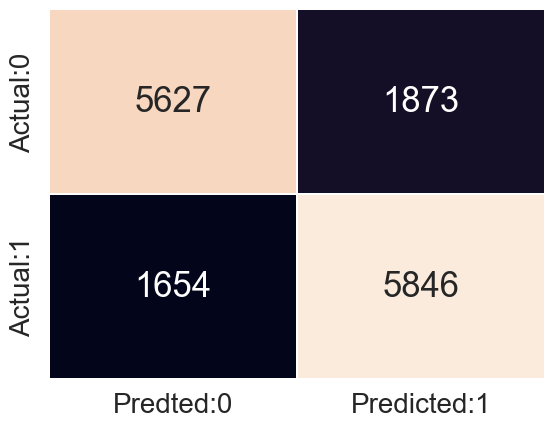

In [118]:
cm = confusion_matrix(y_test, y_pred_FE)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predted:0','Predicted:1'], index = ['Actual:0','Actual:1'])


sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

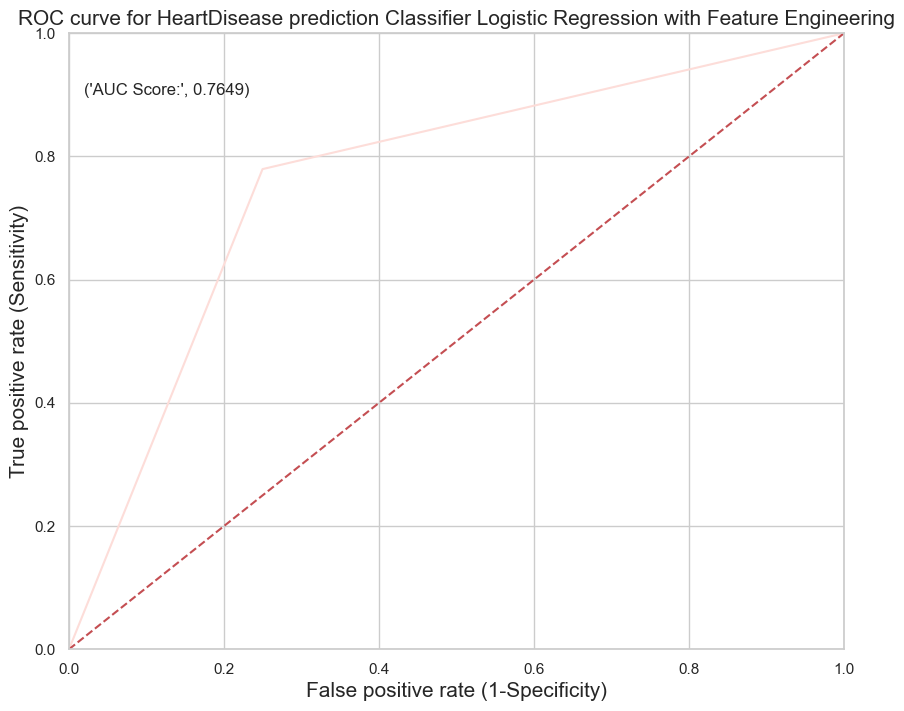

In [119]:
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_FE)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for HeartDisease prediction Classifier Logistic Regression with Feature Engineering', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred_FE),4)))
                               
plt.grid(True)

<a id="38"></a>

<font color='black'>

## MODEL 4

<a id="34"></a>

<font color='black'>

## STACKING ALGORITHM

In [120]:
from sklearn.ensemble import StackingClassifier


level0 = list()
level0.append(('lr', LogisticRegression(class_weight= {0:1, 1:14})))
level0.append(('bayes', GaussianNB()))

# define meta learner model
level1 = LogisticRegression(class_weight= {0:1, 1:14})

# define the stacking ensemble
stc = StackingClassifier(estimators=level0, final_estimator=level1, cv=20)

# fit the model on all available data
stc.fit(X_train, y_train)

# make a prediction for one example
y_pred_stack = stc.predict_proba(X_test)
y_pred_stack = list(pd.DataFrame(y_pred_stack)[1])
y_pred_stack = [0 if x < 0.5 else 1 for x in y_pred_stack]


score_card_stack = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

score_card_stack = score_card_stack.append({'Probability Cutoff': 0.5,
                                'AUC Score' : roc_auc_score(y_test, y_pred_stack),
                                'Precision Score': precision_score(y_test, y_pred_stack),
                                'Recall Score': recall_score(y_test, y_pred_stack),
                                'Accuracy Score': accuracy_score(y_test, y_pred_stack),
                                'Kappa Score':cohen_kappa_score(y_test, y_pred_stack),
                                'f1-score': f1_score(y_test, y_pred_stack)}, 
                                ignore_index = True)
score_card_stack  

Probability Cutoff  AUC Score  Precision Score  Recall Score  \
0                 0.5   0.764533         0.759279      0.774667   

   Accuracy Score  Kappa Score  f1-score  
0        0.764533     0.529067  0.766895

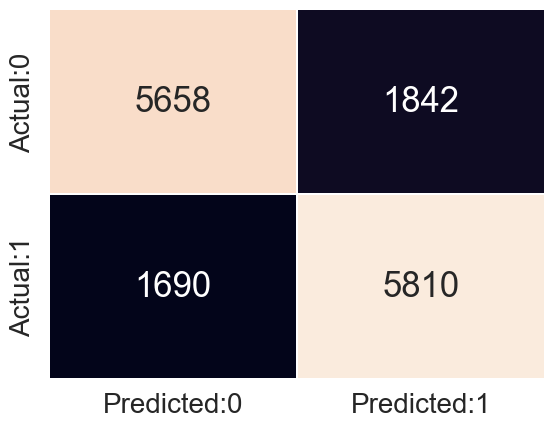

In [121]:
cm = confusion_matrix(y_test, y_pred_stack)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])


sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

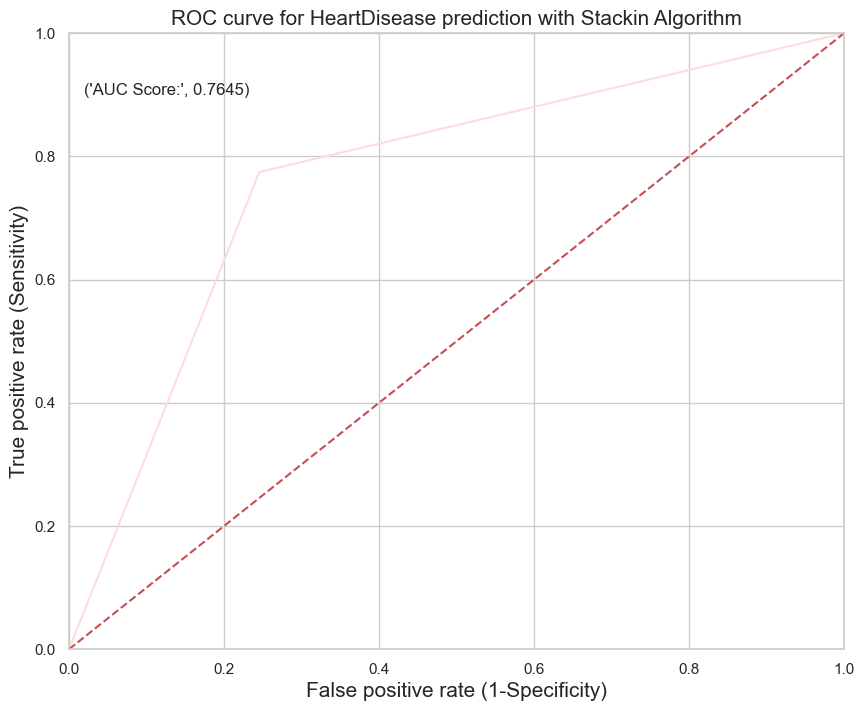

In [122]:
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_stack)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for HeartDisease prediction with Stackin Algorithm', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred_stack),4)))
                               
plt.grid(True)

<a id="35"></a>

<font color='black'>

# PICKLING FINAL MODEL

In [123]:
import pickle
filename = "model.pkl"
pickle.dump(stc,open(filename, 'wb'))